<a href="https://colab.research.google.com/github/RellyRell/Redfin-Real-Estate-Data-/blob/main/RealEstateDatabaseColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Comment out if not in google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#change directory. Comment out if not in google colab
%cd /content/gdrive/MyDrive/'Colab Notebooks'

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
#retrieve dataset from kaggle
!kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset

In [ ]:
'''Unzip file in google colab folder can specify folder by using
 !unzip filename -d directory path'''
! unzip usa-real-estate-dataset.zip -d /content/gdrive/MyDrive/'Colab Notebooks'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv("realtor-data.zip.csv")

In [ ]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [ ]:
#Suming total of null values per column.
df.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [ ]:
#Create a copy of the df for editing
df_filter=df.copy()

In [ ]:
#Checking to ensure data copied correctly
df_filter.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
'''#In case user input is wanted
state_select = input("Which state would you like to analyze: ")
# otherwise manually set state for analysis
# state_select = state_name'''

Which state would you like to analyze: Texas


In [ ]:
'''
states = df_filter['state'].unique() |
Can create a list variable for the while loop to test against or dataframe directly
'''

#In case user input is wanted
#''' Comment out if manually inputting state
state_select = input("Which state would you like to analyze: (Please enter the full state name) ")

while state_select not in df_filter['state'].unique():
  print("The state you selected is invalid. Please check spelling and try again.")
  state_select = input("Which state would you like to analyze: ")
else:
  pass
#'''
# otherwise manually set state for analysis
# state_select = state_name

Which state would you like to analyze: (Please enter the full state name) Caldsa
The state you selected is invalid. Please check spelling and try again.
Which state would you like to analyze: California


In [ ]:
#verify input was captured
print(state_select)

California


In [ ]:
#Checking how much data is available for each state
df_filter['state'].value_counts()

state
Florida                 249432
California              227215
Texas                   208335
New York                103159
North Carolina           85745
Illinois                 85280
Georgia                  80977
Pennsylvania             78373
Arizona                  72825
Virginia                 68763
Washington               62461
Ohio                     59207
New Jersey               48199
Maryland                 46052
Missouri                 45145
Minnesota                43412
Michigan                 42429
Wisconsin                42390
South Carolina           42367
Tennessee                40964
Massachusetts            38041
Oklahoma                 37140
Alabama                  34053
Colorado                 32293
Oregon                   32163
Kentucky                 26316
Louisiana                25815
Arkansas                 23045
Iowa                     23033
New Mexico               21074
Indiana                  18840
Idaho                    16760
Mi

In [ ]:
#consider cleaning data before filtering for specific state
df_filter=df_filter[df_filter['state']==state_select]

In [ ]:
df_filter.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
160666,102093.0,for_sale,3.000000e+06,7.0,6.0,NaN,1760549.0,Balzola,California,0.0,6889.0,NaN
221994,23826.0,for_sale,2.147484e+09,2.0,2.0,0.12,11355.0,International,California,NaN,885.0,NaN
942507,98034.0,for_sale,1.000000e+07,NaN,NaN,123.97,NaN,Playa de Novillero,California,NaN,NaN,NaN
942510,16829.0,for_sale,3.280000e+05,3.0,3.0,NaN,915973.0,Quintana Roo,California,NaN,NaN,NaN
1154530,17458.0,for_sale,1.990000e+05,NaN,NaN,5.10,2937.0,Milford,California,96121.0,NaN,NaN


In [ ]:
#Verify only selected state is actice
df_filter['state'].value_counts()

state
California    227215
Name: count, dtype: int64

In [ ]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227215 entries, 160666 to 2177858
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   brokered_by     226564 non-null  float64
 1   status          227215 non-null  object 
 2   price           227182 non-null  float64
 3   bed             196146 non-null  float64
 4   bath            194142 non-null  float64
 5   acre_lot        204237 non-null  float64
 6   street          226421 non-null  float64
 7   city            227097 non-null  object 
 8   state           227215 non-null  object 
 9   zip_code        227194 non-null  float64
 10  house_size      197617 non-null  float64
 11  prev_sold_date  193018 non-null  object 
dtypes: float64(8), object(4)
memory usage: 22.5+ MB


In [ ]:
#df.isnull().sum() sum of all null values in a df
#dropping all null values prior to analysis. Nulls will not provide an accurate assesment of the data
df_filter.dropna(inplace=True)
#drop duplicated values
df_filter.drop_duplicates(inplace=True)

In [ ]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157724 entries, 1208998 to 2177858
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   brokered_by     157724 non-null  float64
 1   status          157724 non-null  object 
 2   price           157724 non-null  float64
 3   bed             157724 non-null  float64
 4   bath            157724 non-null  float64
 5   acre_lot        157724 non-null  float64
 6   street          157724 non-null  float64
 7   city            157724 non-null  object 
 8   state           157724 non-null  object 
 9   zip_code        157724 non-null  float64
 10  house_size      157724 non-null  float64
 11  prev_sold_date  157724 non-null  object 
dtypes: float64(8), object(4)
memory usage: 15.6+ MB


In [ ]:
df_filter.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1208998,4311.0,for_sale,172999.0,3.0,2.0,0.16,987585.0,Blythe,California,92225.0,1132.0,1984-06-29
1209113,4311.0,for_sale,201000.0,2.0,2.0,0.34,761139.0,Blythe,California,92225.0,1100.0,1997-09-23
1209116,76008.0,for_sale,250000.0,7.0,3.0,0.19,1002149.0,Blythe,California,92225.0,3126.0,2015-09-23
1209118,86230.0,for_sale,325000.0,3.0,2.0,5.00,664584.0,Blythe,California,92225.0,1925.0,1985-01-14
1209120,22611.0,for_sale,287500.0,5.0,3.0,0.20,1230938.0,Blythe,California,92225.0,1642.0,2018-03-08


In [ ]:
#Dropping street and brokered by column. It is encoded and not going to provide helpful insight to the questions we want to answer
# default axis is 0 which are the rows. Test without inplace first to ensure changes are accurate
df_filter.drop(['street','brokered_by'], axis=1, inplace=True)


In [ ]:
df_filter.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
1208998,for_sale,172999.0,3.0,2.0,0.16,Blythe,California,92225.0,1132.0,1984-06-29
1209113,for_sale,201000.0,2.0,2.0,0.34,Blythe,California,92225.0,1100.0,1997-09-23
1209116,for_sale,250000.0,7.0,3.0,0.19,Blythe,California,92225.0,3126.0,2015-09-23
1209118,for_sale,325000.0,3.0,2.0,5.00,Blythe,California,92225.0,1925.0,1985-01-14
1209120,for_sale,287500.0,5.0,3.0,0.20,Blythe,California,92225.0,1642.0,2018-03-08


##**Questions we will be answering the following questions for our selected state**

***

1.   Average home sale price per city in selected state
2.   Most popular bed bath in selected state w/ graphical display
3.   What year had the highest value of home sales w/ graphical display for selected state
4.   What state sold the highest number of homes
5.  What state has the highest number of active listings

***




###**Question 1: Average home sale price per city in selected state**

In [ ]:
df_filter['status'].value_counts()

status
sold        103085
for_sale     54639
Name: count, dtype: int64

In [ ]:
#Filtering by sold homes. Active/Pending homes cannot be used for avg 'sale' price
q1=df_filter[df_filter['status']=='sold']

In [ ]:
#grouping by city then finding average sale price per city
#reset_index keeps it in a dataframe otherwise it will become a series
statsq1=q1.groupby('city')['price'].mean().reset_index()#.transpose()

In [ ]:
statsq1

,city,price
0,Acampo,7.963681e+05
1,Acton,7.885246e+05
2,Adelanto,3.567545e+05
3,Agoura,1.525000e+06
4,Agoura Hills,1.229697e+06
...,...,...
1034,Yountville,1.495000e+06
1035,Yreka,3.255909e+05
1036,Yuba City,4.382501e+05
1037,Yucaipa,5.415966e+05


In [ ]:
#Updating/rename column header to add more detail. Must be dataframe to use this method
statsq1.columns.values[1] = 'Average Sale Price'
statsq1= statsq1.round(2)

In [ ]:
statsq1

,city,Average Sale Price
0,Acampo,796368.12
1,Acton,788524.62
2,Adelanto,356754.50
3,Agoura,1525000.00
4,Agoura Hills,1229696.97
...,...,...
1034,Yountville,1495000.00
1035,Yreka,325590.91
1036,Yuba City,438250.07
1037,Yucaipa,541596.63


In [ ]:
#alternative method to find the mean using the describe function. Comment out and execute line by line to see changes.
test=q1.groupby('city')['price'].describe().reset_index()
test=test[['city','mean']] # pulling just the mean and city name into a separate table
test['mean']=test['mean'].round(2)
test.columns.values[1] = 'Average Sale Price' #column names need to match in order to compare.
test.equals(statsq1) # Comapring the two results to see if they match


True

###**Question 2: Most popular bed bath combination in selected state**

In [ ]:
q2 = df_filter.groupby('state')[['bed','bath']].value_counts().reset_index()
q2

,state,bed,bath,count
0,California,3.0,2.0,39765
1,California,4.0,3.0,21235
2,California,3.0,3.0,18314
3,California,2.0,2.0,15321
4,California,4.0,2.0,13565
...,...,...,...,...
329,California,18.0,10.0,1
330,California,18.0,16.0,1
331,California,2.0,25.0,1
332,California,18.0,22.0,1


In [ ]:
###Testing .join and map methods for following code.
x=[[5,6],8,'alpha', '-'.join(map(str,[1,'aa']))]
print(x)


[[5, 6], 8, 'alpha', '1-aa']


In [ ]:
''' in order to capture the correct bed bath of the top 5 i indexed the corresponding column and rows
.join combines two strs together and map changes the int (from the indexing) to a str
'''
import matplotlib.pyplot as plt
q2_top=q2.head()
#q2_f= q2_top.rename(index={0:[q2_top['bed'][0],q2_top['bath'][0]],1:'4/3',2:'3/3',3:'4/2',4:'4/4'}).reset_index()
q2_f= q2_top.rename(index={0:'/'.join(map(str,[q2_top['bed'][0],q2_top['bath'][0]])),1:'/'.join(map(str,[q2_top['bed'][1],q2_top['bath'][1]])),2:'/'.join(map(str,[q2_top['bed'][2],q2_top['bath'][2]])),3:'/'.join(map(str,[q2_top['bed'][3],q2_top['bath'][3]])),4:'/'.join(map(str,[q2_top['bed'][4],q2_top['bath'][4]]))}).reset_index()
q2_f.columns.values[0]='bed/bath'
q2_f

,bed/bath,state,bed,bath,count
0,3.0/2.0,California,3.0,2.0,39765
1,4.0/3.0,California,4.0,3.0,21235
2,3.0/3.0,California,3.0,3.0,18314
3,2.0/2.0,California,2.0,2.0,15321
4,4.0/2.0,California,4.0,2.0,13565


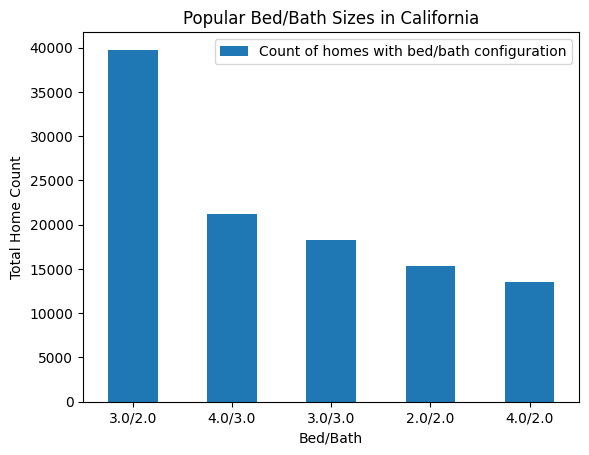

In [ ]:
q2_f.plot(kind='bar',x='bed/bath',y='count', title='Popular Bed/Bath Sizes in '+ state_select)
plt.xlabel('Bed/Bath')
plt.ylabel('Total Home Count')
plt.legend(['Count of homes with bed/bath configuration'])
plt.xticks(rotation=0) # ticks were rotated by deafult, required zeroing out
plt.show()

###**Question 3: What year had the highest value of home sales in selected state w/ graphical display**

In [ ]:
df_filter.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
1208998,for_sale,172999.0,3.0,2.0,0.16,Blythe,California,92225.0,1132.0,1984-06-29
1209113,for_sale,201000.0,2.0,2.0,0.34,Blythe,California,92225.0,1100.0,1997-09-23
1209116,for_sale,250000.0,7.0,3.0,0.19,Blythe,California,92225.0,3126.0,2015-09-23
1209118,for_sale,325000.0,3.0,2.0,5.00,Blythe,California,92225.0,1925.0,1985-01-14
1209120,for_sale,287500.0,5.0,3.0,0.20,Blythe,California,92225.0,1642.0,2018-03-08


In [ ]:
q3 = df_filter#[df_filter['status']=='sold'] decided not to filter by sold becuase it limits results to 2 years.
q3.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
1208998,for_sale,172999.0,3.0,2.0,0.16,Blythe,California,92225.0,1132.0,1984-06-29
1209113,for_sale,201000.0,2.0,2.0,0.34,Blythe,California,92225.0,1100.0,1997-09-23
1209116,for_sale,250000.0,7.0,3.0,0.19,Blythe,California,92225.0,3126.0,2015-09-23
1209118,for_sale,325000.0,3.0,2.0,5.00,Blythe,California,92225.0,1925.0,1985-01-14
1209120,for_sale,287500.0,5.0,3.0,0.20,Blythe,California,92225.0,1642.0,2018-03-08


In [ ]:
q3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157724 entries, 1208998 to 2177858
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          157724 non-null  object 
 1   price           157724 non-null  float64
 2   bed             157724 non-null  float64
 3   bath            157724 non-null  float64
 4   acre_lot        157724 non-null  float64
 5   city            157724 non-null  object 
 6   state           157724 non-null  object 
 7   zip_code        157724 non-null  float64
 8   house_size      157724 non-null  float64
 9   prev_sold_date  157724 non-null  object 
dtypes: float64(6), object(4)
memory usage: 13.2+ MB


In [ ]:
q3['prev_sold_date']=pd.to_datetime(q3['prev_sold_date'])

In [ ]:
q3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157724 entries, 1208998 to 2177858
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   status          157724 non-null  object        
 1   price           157724 non-null  float64       
 2   bed             157724 non-null  float64       
 3   bath            157724 non-null  float64       
 4   acre_lot        157724 non-null  float64       
 5   city            157724 non-null  object        
 6   state           157724 non-null  object        
 7   zip_code        157724 non-null  float64       
 8   house_size      157724 non-null  float64       
 9   prev_sold_date  157724 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 13.2+ MB


In [ ]:
q3['sold_year']=q3['prev_sold_date'].dt.year
q3.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,sold_year
1208998,for_sale,172999.0,3.0,2.0,0.16,Blythe,California,92225.0,1132.0,1984-06-29,1984
1209113,for_sale,201000.0,2.0,2.0,0.34,Blythe,California,92225.0,1100.0,1997-09-23,1997
1209116,for_sale,250000.0,7.0,3.0,0.19,Blythe,California,92225.0,3126.0,2015-09-23,2015
1209118,for_sale,325000.0,3.0,2.0,5.00,Blythe,California,92225.0,1925.0,1985-01-14,1985
1209120,for_sale,287500.0,5.0,3.0,0.20,Blythe,California,92225.0,1642.0,2018-03-08,2018


In [ ]:
statsq3=q3.groupby('sold_year')['price'].sum().reset_index()
statsq3['price']=statsq3['price'].round(2)
q3_top=statsq3.sort_values(by='price', ascending=False).head(10) # picking the top 10 most lucrative years and sorting them by price to put into a new variable
q3_top.columns.values[1]='Total Sales'
q3_top

,sold_year,Total Sales
61,2022,7.869244e+10
60,2021,3.217443e+10
57,2018,4.536818e+09
56,2017,4.022042e+09
58,2019,3.872746e+09
55,2016,3.505691e+09
54,2015,3.476700e+09
59,2020,3.076716e+09
52,2013,2.495535e+09
53,2014,2.472846e+09


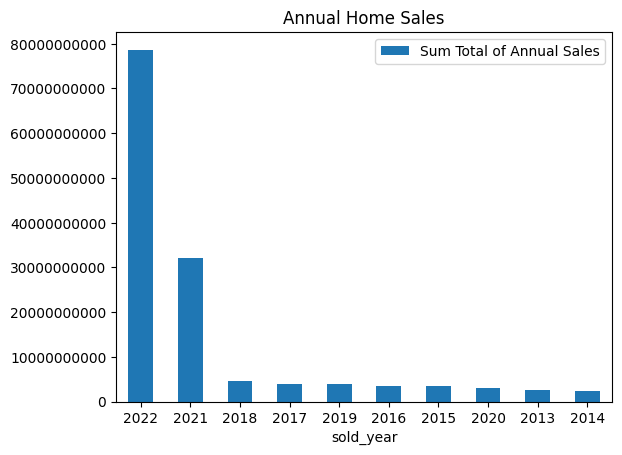

In [ ]:
q3_top.plot(kind='bar', x='sold_year', y='Total Sales')
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(['Sum Total of Annual Sales'])
plt.title('Annual Home Sales')
plt.show()

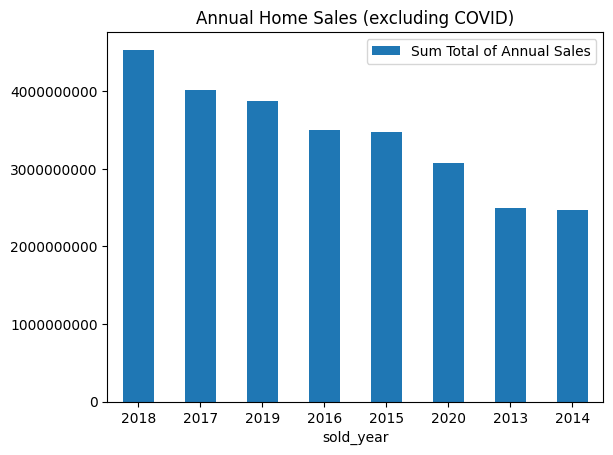

In [ ]:
# For fun lets exclude 2022 and 2021 becasue of the massive Covid increase
q3_covid=q3_top[2:] # excluding covid years
q3_covid.plot(kind='bar', x='sold_year', y='Total Sales')
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Annual Home Sales (excluding COVID)')
plt.legend(['Sum Total of Annual Sales'])
plt.show()


### **Question 4 :What state sold the highest number of homes**

In [ ]:
q4=df.copy()
#Have to reclean data that is unfiltered by state
q4.dropna(inplace=True)
q4.drop_duplicates(inplace=True)
q4.drop(['street','brokered_by'], axis=1, inplace=True)
#q4.info()
#q4.isnull().sum()
q4.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
502,for_sale,110000.0,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
2270,for_sale,950000.0,5.0,4.0,0.99,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
2277,for_sale,6899000.0,4.0,6.0,0.83,Saint Thomas,Virgin Islands,802.0,4600.0,2018-04-05
3409,for_sale,525000.0,3.0,3.0,0.45,Agawam,Massachusetts,1001.0,2314.0,2014-06-25
3410,for_sale,289900.0,3.0,2.0,0.36,Agawam,Massachusetts,1001.0,1276.0,2012-10-12


In [ ]:
q4_sold=q4[q4['status']=='sold']
#q4_sold.head()
q4_sold['count']=''
#q4_sold.groupby('state').count().reset_index()
q4_sold.iloc[2]['bed']

<ipython-input-223-26f1294fe793>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4_sold['count']=''


2.0

In [ ]:
test=q1['city'].value_counts().reset_index()
q1[q1['city']=='China']

,brokered_by,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
1982625,27172.0,sold,129900.0,3.0,2.0,1.55,China,Texas,77613.0,1560.0,2022-04-19
1987366,53573.0,sold,358000.0,4.0,3.0,6.26,China,Texas,77613.0,2475.0,2021-11-30


In [ ]:
|df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [ ]:
#Filtering for sold entries
df_tx=df_tx[df_tx['status']=='sold']
df_tx['status'].value_counts()

status
sold    37462
Name: count, dtype: int64

In [ ]:
df_tx.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1893536,33968.0,sold,210000.0,3.0,2.0,0.49,937700.0,Orange,Texas,77632.0,1572.0,2022-03-15
1893546,3184.0,sold,109900.0,2.0,1.0,0.21,1562452.0,Groves,Texas,77619.0,1146.0,2021-11-30
1893564,21946.0,sold,44900.0,2.0,1.0,0.20,57775.0,Orange,Texas,77630.0,1118.0,2022-01-28
1893609,81697.0,sold,399999.0,3.0,3.0,72.50,41649.0,Newton,Texas,75966.0,2591.0,2022-02-04
1893688,44618.0,sold,41072.0,NaN,NaN,9.66,1865688.0,Newton,Texas,75966.0,NaN,2021-11-29


In [ ]:
count2=df_tx.count()

In [ ]:
#https://stackoverflow.com/questions/51607400/how-to-extract-first-8-characters-from-a-string-in-pandas
df_tx['sold_year']=df_tx['prev_sold_date'].str[:4]

/var/folders/ml/jvp43kk1017bf_6s11v5hsc00000gn/T/ipykernel_6447/2506656112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tx['sold_year']=df_tx['prev_sold_date'].str[:4]


In [ ]:
df_tx.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,sold_year
1893536,33968.0,sold,210000.0,3.0,2.0,0.49,937700.0,Orange,Texas,77632.0,1572.0,2022-03-15,2022
1893546,3184.0,sold,109900.0,2.0,1.0,0.21,1562452.0,Groves,Texas,77619.0,1146.0,2021-11-30,2021
1893564,21946.0,sold,44900.0,2.0,1.0,0.20,57775.0,Orange,Texas,77630.0,1118.0,2022-01-28,2022
1893609,81697.0,sold,399999.0,3.0,3.0,72.50,41649.0,Newton,Texas,75966.0,2591.0,2022-02-04,2022
1893688,44618.0,sold,41072.0,NaN,NaN,9.66,1865688.0,Newton,Texas,75966.0,NaN,2021-11-29,2021


In [ ]:
df_tx.isnull().sum()

brokered_by         12
status               0
price                0
bed               8053
bath              8075
acre_lot          1455
street              50
city                 7
state                0
zip_code             0
house_size        7851
prev_sold_date       0
sold_year            0
dtype: int64

In [ ]:
#removed rows that dont have bed/bath information as it wount be good to compare to.
df_tx.dropna(inplace=True)

In [ ]:
df_tx.isnull().sum()

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
sold_year         0
dtype: int64

In [ ]:
#Filter for only 3 bed 2 bath and above
df_tx=df_tx[~df_tx['bed'].isin([0,1,2])]

In [ ]:
df_tx=df_tx[~df_tx['bath'].isin([0,1])]

In [ ]:
df_tx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27677 entries, 1893702 to 2047586
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brokered_by     27677 non-null  float64
 1   status          27677 non-null  object 
 2   price           27677 non-null  float64
 3   bed             27677 non-null  float64
 4   bath            27677 non-null  float64
 5   acre_lot        27677 non-null  float64
 6   street          27677 non-null  float64
 7   city            27677 non-null  object 
 8   state           27677 non-null  object 
 9   zip_code        27677 non-null  float64
 10  house_size      27677 non-null  float64
 11  prev_sold_date  27677 non-null  object 
 12  sold_year       27677 non-null  object 
dtypes: float64(8), object(5)
memory usage: 3.0+ MB


In [ ]:
df_tx.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,sold_year
1893702,53573.0,sold,285000.0,4.0,3.0,0.33,687419.0,Bridge City,Texas,77611.0,2190.0,2022-04-04,2022
1894310,101219.0,sold,170000.0,4.0,2.0,2.78,1701687.0,Tenaha,Texas,75974.0,1400.0,2021-11-12,2021
1894657,22036.0,sold,292900.0,4.0,2.0,1.35,84545.0,Marshall,Texas,75672.0,2850.0,2022-04-21,2022
1894980,62473.0,sold,425000.0,4.0,3.0,2.12,378749.0,Center,Texas,75935.0,2954.0,2022-04-14,2022
1894981,100787.0,sold,1999000.0,4.0,5.0,12.53,1403246.0,Hemphill,Texas,75948.0,5000.0,2022-04-14,2022


In [ ]:
df_tx.count()

brokered_by       27677
status            27677
price             27677
bed               27677
bath              27677
acre_lot          27677
street            27677
city              27677
state             27677
zip_code          27677
house_size        27677
prev_sold_date    27677
sold_year         27677
dtype: int64

In [ ]:
count3=df_tx.count()

In [ ]:
counter=[count1,count2,count3]

In [ ]:
#comparing how the data is shrinking just for my reference
counterdf=pd.DataFrame(counter)
counterdf.transpose()

,0,1,2
brokered_by,2221849.0,80515.0,27677.0
status,2226382.0,80548.0,27677.0
price,2224841.0,80548.0,27677.0
bed,1745065.0,72443.0,27677.0
bath,1714611.0,72451.0,27677.0
acre_lot,1900793.0,76679.0,27677.0
street,2215516.0,80466.0,27677.0
city,2224975.0,80538.0,27677.0
state,2226374.0,80548.0,27677.0
zip_code,2226083.0,80548.0,27677.0


In [ ]:
df_tx['price'].mean()

517049.51667449507

In [ ]:
#Average price amoung homes in texas
df_tx.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,27677.000000,2.767700e+04,27677.000000,27677.000000,27677.000000,2.767700e+04,27677.000000,27677.000000
mean,53611.542147,5.170495e+05,4.202045,3.213751,2.161906,9.154466e+05,76776.516349,2790.012971
std,29385.876865,4.771694e+05,0.582795,1.084476,92.678209,5.267355e+05,1216.110586,1044.296385
min,51.000000,3.000000e+04,4.000000,2.000000,0.000000,7.132000e+03,75002.000000,700.000000
25%,27979.000000,3.029900e+05,4.000000,2.000000,0.160000,4.546140e+05,76017.000000,2115.000000
50%,52976.000000,3.990000e+05,4.000000,3.000000,0.200000,8.958980e+05,77055.000000,2590.000000
75%,78566.000000,5.539950e+05,4.000000,4.000000,0.280000,1.384359e+06,77450.000000,3232.000000
max,110120.000000,1.600000e+07,40.000000,29.000000,8520.000000,1.941507e+06,88021.000000,21500.000000


In [ ]:
df_tx32=df_tx[df_tx['bath'].isin([2])]

In [ ]:
df_tx32=df_tx[df_tx['bed'].isin([4])]


In [ ]:
df_tx32['bed'].value_counts()

bed
4.0    22899
Name: count, dtype: int64

In [ ]:
df_tx32.head(10)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,sold_year
1894310,101219.0,sold,170000.0,4.0,2.0,2.78,1701687.0,Tenaha,Texas,75974.0,1400.0,2021-11-12,2021
1894657,22036.0,sold,292900.0,4.0,2.0,1.35,84545.0,Marshall,Texas,75672.0,2850.0,2022-04-21,2022
1907427,15901.0,sold,365000.0,4.0,2.0,0.17,1721651.0,Hurst,Texas,76053.0,1898.0,2022-03-01,2022
1907441,20852.0,sold,339900.0,4.0,2.0,0.26,1541030.0,North Richland Hills,Texas,76182.0,1900.0,2022-03-01,2022
1907443,10602.0,sold,342900.0,4.0,2.0,0.13,1491928.0,Fort Worth,Texas,76179.0,1945.0,2022-03-01,2022
1907449,38634.0,sold,155000.0,4.0,2.0,0.32,1657683.0,Fort Worth,Texas,76135.0,1516.0,2022-03-01,2022
1907452,53016.0,sold,240000.0,4.0,2.0,0.15,1489197.0,Fort Worth,Texas,76112.0,1887.0,2022-03-01,2022
1907453,98136.0,sold,245000.0,4.0,2.0,0.16,1599155.0,Saginaw,Texas,76179.0,1489.0,2022-03-01,2022
1907463,60978.0,sold,345000.0,4.0,2.0,0.13,1811994.0,Fort Worth,Texas,76177.0,1693.0,2022-03-02,2022
1907472,109950.0,sold,299000.0,4.0,2.0,0.22,1041550.0,Fort Worth,Texas,76119.0,1741.0,2022-03-02,2022


In [ ]:
df['bed'].value_counts()

bed
3.0      753923
4.0      440566
2.0      311019
5.0      120637
1.0       65098
          ...  
110.0         1
82.0          1
69.0          1
102.0         1
120.0         1
Name: count, Length: 99, dtype: int64